Importing the necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.table import Table

Defining the GridWorld class which represents our environment.

In [2]:
class GridWorld:
    def __init__(self, world_size=5, discount=0.9):
        self.world_size = world_size      # Size of the grid world
        self.discount = discount          # Discount factor for future rewards
        self.A_pos = [0, 1]               # Position of special state A
        self.A_prime_pos = [4, 1]         # Transition state for A
        self.B_pos = [0, 3]               # Position of special state B
        self.B_prime_pos = [2, 3]         # Transition state for B
        self.actions = [                  # Possible actions: left, up, right, down
            np.array([0, -1]),            # Left
            np.array([-1, 0]),            # Up
            np.array([0, 1]),             # Right
            np.array([1, 0])              # Down
        ]
        self.action_prob = 0.25           # Probability for each action under a uniform random policy

    def step(self, state, action):
        # Handle special states A and B
        if state == self.A_pos:
            return self.A_prime_pos, 10   # Move to A' with a reward of 10
        if state == self.B_pos:
            return self.B_prime_pos, 5    # Move to B' with a reward of 5

        # Calculate the next state
        next_state = (np.array(state) + action).tolist()
        x, y = next_state

        # Check for boundary conditions
        if x < 0 or x >= self.world_size or y < 0 or y >= self.world_size:
            return state, -1.0            # If out of bounds, stay in the same state with a reward of -1
        return next_state, 0              # Otherwise, move to the next state with no reward

We define a function compute_state_value that calculates the value of a given state based on the current value function.

In [3]:
def compute_state_value(state, value, grid_world):
    v = 0
    # Iterate over all possible actions
    for action in grid_world.actions:
        next_state, reward = grid_world.step(state, action)
        next_i, next_j = next_state
        # Update the value based on the Bellman equation
        v += grid_world.action_prob * (
            reward + grid_world.discount * value[next_i, next_j]
        )
    return v

The value_iteration function performs the value iteration algorithm, updating the value function until it converges within a specified threshold.

In [4]:
def value_iteration(grid_world, threshold=1e-4):
    # Initialize the value function with zeros
    value = np.zeros((grid_world.world_size, grid_world.world_size))
    while True:
        new_value = np.zeros_like(value)
        # Loop over each state in the grid
        for i in range(grid_world.world_size):
            for j in range(grid_world.world_size):
                state = [i, j]
                # Compute the new value for the current state
                new_value[i, j] = compute_state_value(state, value, grid_world)
        # Check for convergence
        if np.max(np.abs(value - new_value)) < threshold:
            break
        value = new_value
    return value

The draw_image function visualizes the final value function as a table and displays it.

In [5]:
def draw_image(value_function, filename='my_figure_3_2.png'):
    fig, ax = plt.subplots()
    ax.set_axis_off()
    tb = Table(ax, bbox=[0, 0, 1, 1])

    nrows, ncols = value_function.shape
    width, height = 1.0 / ncols, 1.0 / nrows

    # Add cells to the table
    for (i, j), val in np.ndenumerate(value_function):
        tb.add_cell(
            i, j, width, height,
            text=round(val, 1),       # Round the value for display
            loc='center',
            facecolor='white'
        )

    ax.add_table(tb)
    plt.savefig(filename)
    plt.show()
    plt.close()

We instantiate the GridWorld environment, perform value iteration, and visualize the resulting value function.

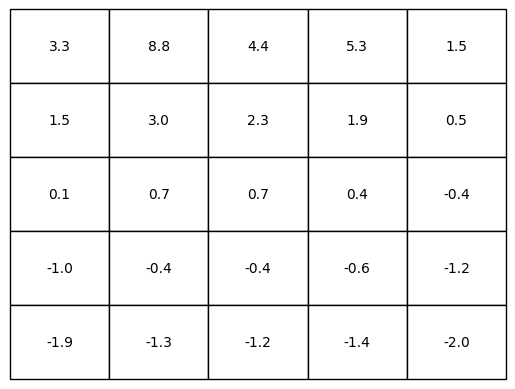

In [6]:
grid_world = GridWorld(world_size=5, discount=0.9)
value = value_iteration(grid_world)
draw_image(value)